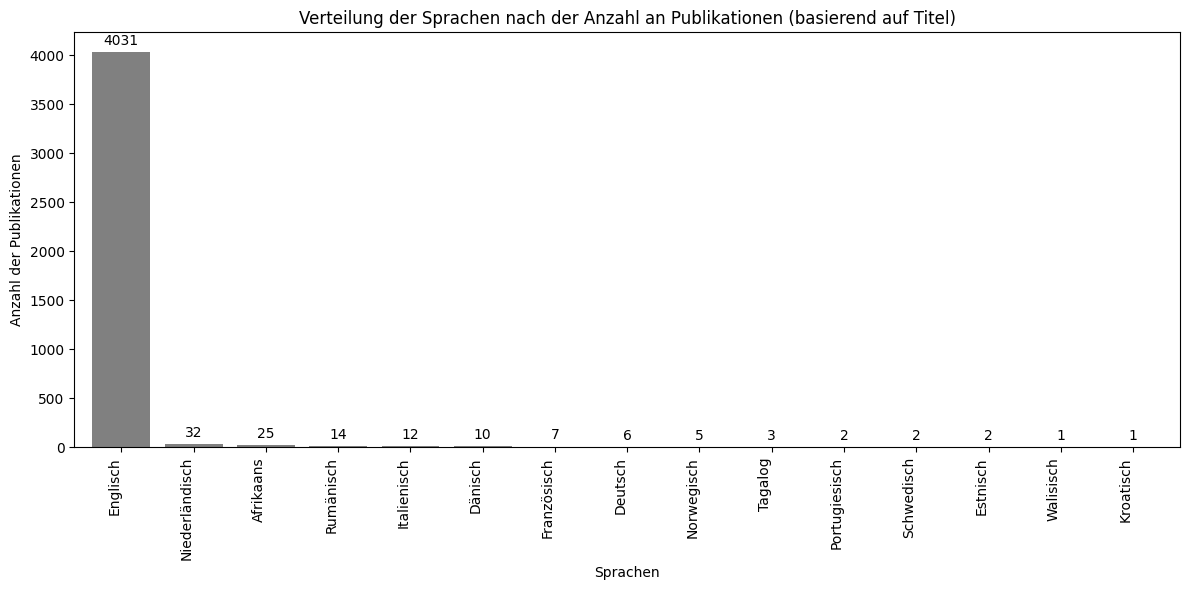

Sprachverteilung der Publikationen:
Language Full
Englisch          4031
Niederländisch      32
Afrikaans           25
Rumänisch           14
Italienisch         12
Dänisch             10
Französisch          7
Deutsch              6
Norwegisch           5
Tagalog              3
Portugiesisch        2
Schwedisch           2
Estnisch             2
Walisisch            1
Kroatisch            1
Name: count, dtype: int64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

# Den Pfad zur CSV-Datei definieren (angenommen, sie liegt im 'Data'-Ordner deines Projekts)
csv_file_path = os.path.join(os.getcwd(), '..', 'Data', 'Dataset.csv')

# CSV-Datei einlesen
df = pd.read_csv(csv_file_path)

# Funktion zur Spracherkennung
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "Unknown"

# Neue Spalte für die Sprache hinzufügen (basierend auf 'Document Title')
df['Language'] = df['Document Title'].apply(lambda x: detect_language(str(x)))

# Mapping von Sprachkürzeln zu vollen Namen (auf Deutsch)
language_full_names = {
    'en': 'Englisch',
    'nl': 'Niederländisch',
    'af': 'Afrikaans',
    'ro': 'Rumänisch',
    'it': 'Italienisch',
    'da': 'Dänisch',
    'fr': 'Französisch',
    'de': 'Deutsch',
    'no': 'Norwegisch',
    'tl': 'Tagalog',
    'sv': 'Schwedisch',
    'pt': 'Portugiesisch',
    'et': 'Estnisch',
    'cy': 'Walisisch',
    'hr': 'Kroatisch'
}

# Sprachkürzel in volle Namen umwandeln
df['Language Full'] = df['Language'].map(language_full_names).fillna('Unknown')

# 'Unknown' herausfiltern
df = df[df['Language Full'] != 'Unknown']

# Häufigkeit der Sprachen berechnen
language_counts = df['Language Full'].value_counts()

# Visualisierung der Sprachverteilung
plt.figure(figsize=(12, 6))
ax = language_counts.plot(kind='bar', color='gray', width=0.8)
plt.title('Verteilung der Sprachen nach der Anzahl an Publikationen (basierend auf Titel)')
plt.ylabel('Anzahl der Publikationen')
plt.xlabel('Sprachen')

# X-Achse mit ausgeschriebenen Sprachbezeichnungen
ax.set_xticks(range(len(language_counts)))
ax.set_xticklabels(language_counts.index, rotation=90, ha='right')

# Werte auf die Balken schreiben
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

# Ausgabe der Sprachverteilung in der Konsole
print("Sprachverteilung der Publikationen:")
print(language_counts)
